In [169]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [170]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [171]:
from IPython.display import HTML
style = '<style>svg(width:70% !important; height:70% !important;)</style>'
HTML(style)

In [172]:
titanic = pd.read_csv('/Users/nasty/Downloads/train.csv')

In [173]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [174]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [175]:
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
y = titanic.Survived

In [176]:
X = pd.get_dummies(X)

In [177]:
X.Age.median()

28.0

In [178]:
X = X.fillna({'Age':X.Age.median()})

In [179]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [180]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [181]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [182]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

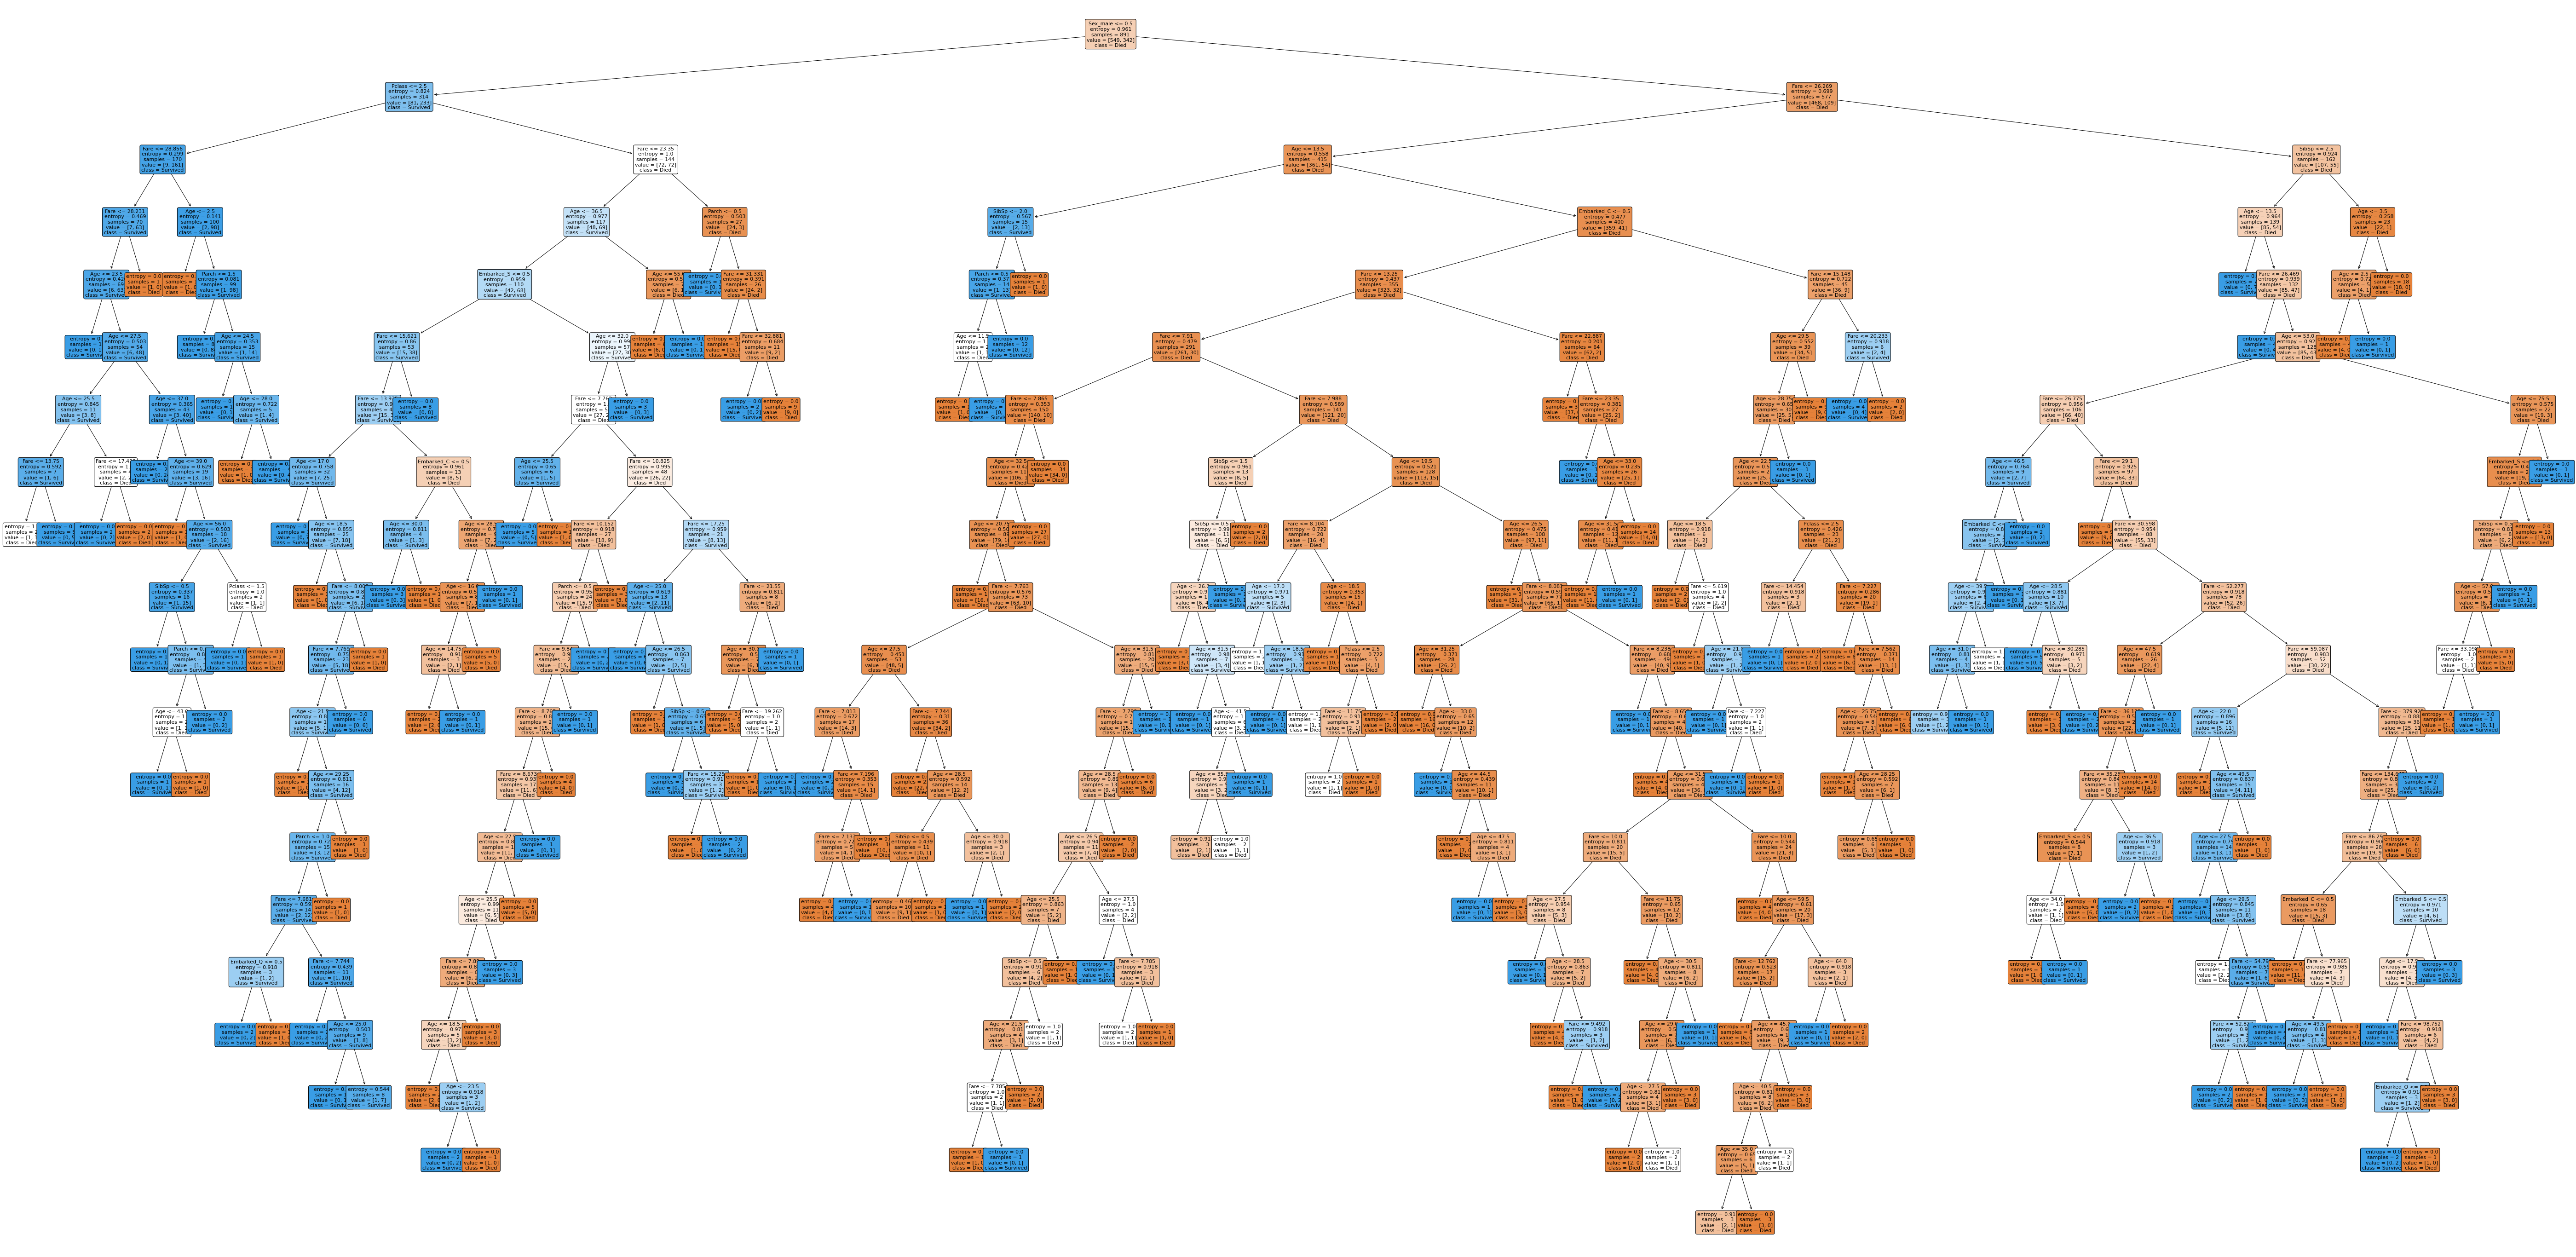

In [183]:
plt.figure(figsize=(100, 50))
tree.plot_tree(clf, 
               feature_names=list(X), 
               class_names=['Died', 'Survived'], 
               filled=True,
               rounded=True,
               fontsize = 11)
plt.show()

In [184]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [187]:
X_train.shape

(596, 10)

In [188]:
X_test.shape

(295, 10)

In [189]:
y_train.shape

(596,)

In [190]:
y_test.shape

(295,)

In [191]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3)

In [192]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [193]:
clf.score(X_train, y_train)

0.8238255033557047

In [194]:
clf.score(X_test, y_test)

0.8203389830508474

# # 2.4 Обучение, переобучение, недообучение и кросвалидация

In [56]:
max_depth_values = range(1, 100)

In [92]:
scores_data = pd.DataFrame()

In [93]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 
                                'train_score':[train_score], 
                                'test_score':[test_score],
                                   'cross_val_score':[mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [94]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.798711
...,...,...,...,...
0,95,0.979866,0.779661,0.765154
0,96,0.979866,0.783051,0.773529
0,97,0.979866,0.779661,0.771849
0,98,0.979866,0.772881,0.760112


In [95]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], 
                           value_vars = ['train_score', 'test_score', 'cross_val_score'],
                          var_name = 'set_type', 
                          value_name = 'score')

In [96]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.765154
293,96,cross_val_score,0.773529
294,97,cross_val_score,0.771849
295,98,cross_val_score,0.760112


In [97]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.798711
203,6,cross_val_score,0.805434
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.803725
206,9,cross_val_score,0.795308
207,10,cross_val_score,0.805392


<AxesSubplot:xlabel='max_depth', ylabel='score'>

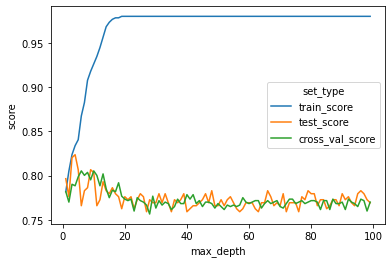

In [98]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

# Кросвалидация!!!

In [99]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=10)

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
cross_val_score(clf, X_test, y_test, cv=5)

array([0.86440678, 0.76271186, 0.79661017, 0.76271186, 0.72881356])

In [102]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7735434173669468

# GridSearchCV

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [105]:
parametrs = {'criterion':['gini', 'entropy'], 'max_depth' : range(1, 30)}

In [106]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv = 5)

In [107]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [108]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [109]:
best_clf = grid_search_cv_clf.best_estimator_

In [110]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [111]:
best_clf.score(X_test, y_test)

0.7932203389830509

In [112]:
from sklearn.metrics import precision_score, recall_score

In [113]:
y_pred = best_clf.predict(X_test)

In [114]:
precision_score(y_test, y_pred)

0.8041237113402062

In [115]:
recall_score(y_test, y_pred)

0.65

In [116]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [117]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [118]:
y_predicted_prob[:,1]

array([0.1147541 , 0.38461538, 0.1147541 , 1.        , 1.        ,
       0.        , 0.75      , 0.1147541 , 0.75      , 1.        ,
       1.        , 0.09803922, 0.        , 0.1147541 , 0.09803922,
       1.        , 0.        , 0.30434783, 0.1147541 , 0.        ,
       0.1147541 , 0.32      , 0.30434783, 0.1147541 , 0.1147541 ,
       0.        , 0.32      , 0.38461538, 0.        , 0.30434783,
       0.1147541 , 1.        , 0.32      , 1.        , 0.1147541 ,
       0.1147541 , 0.32      , 0.75      , 1.        , 0.1147541 ,
       0.        , 0.1147541 , 0.1147541 , 0.1147541 , 0.        ,
       0.1147541 , 0.1147541 , 0.1147541 , 0.1147541 , 0.        ,
       1.        , 1.        , 0.09803922, 1.        , 0.        ,
       1.        , 0.38461538, 0.        , 1.        , 0.30434783,
       0.1147541 , 1.        , 1.        , 0.        , 0.1147541 ,
       1.        , 0.        , 0.1147541 , 0.1147541 , 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.11475

<AxesSubplot:>

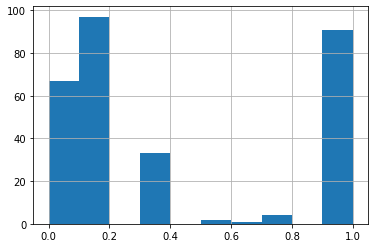

In [119]:
pd.Series(y_predicted_prob[:,1]).hist()

In [120]:
y_pred = np.where(y_predicted_prob[:,1] > 0.9, 1, 0)

In [121]:
precision_score(y_test, y_pred)

0.8131868131868132

In [122]:
recall_score(y_test, y_pred)

0.6166666666666667

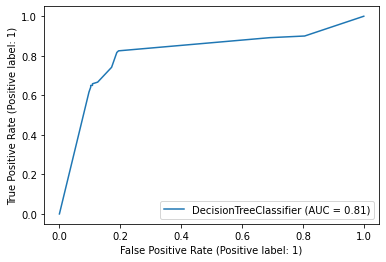

In [195]:
from sklearn import metrics

metrics.plot_roc_curve(best_clf, X_test, y_test)

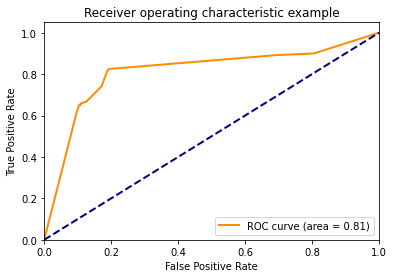

In [196]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')    #precision
plt.ylabel('True Positive Rate')     #recall
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()